In [ ]:
# ==========================================
# Diabetes Predictive Modeling
# ==========================================

In [10]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Set plot style
sns.set_style("whitegrid")

In [11]:
# 1. Load Dataset
# ------------------------------------------
url = 'https://raw.githubusercontent.com/andrewtran-data/diabetes-analysis/main/data/diabetes.csv'
data = pd.read_csv(url)

# Show first 5 rows
print("First 5 rows:")
print(data.head())

# Show summary statistics
print("\nSummary statistics:")
print(data.describe())

# Check for zero values in important columns
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols:
    zeros = (data[col] == 0).sum()
    print(f"{col}: {zeros} zero values")


First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Summary statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.3

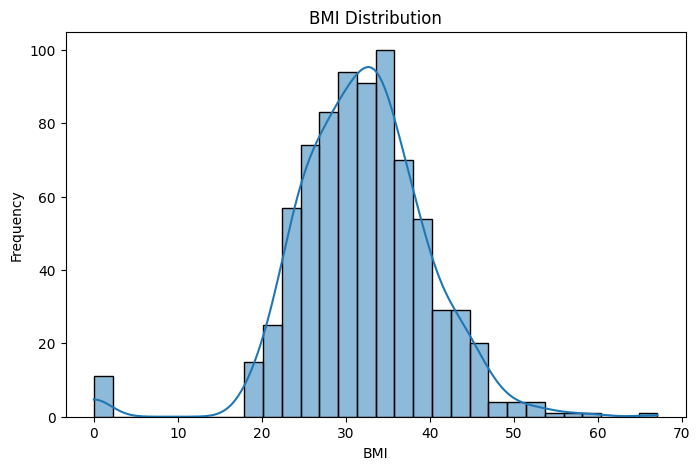

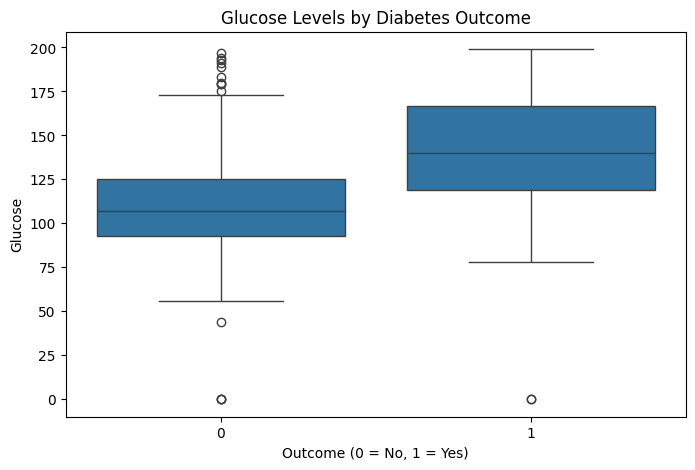

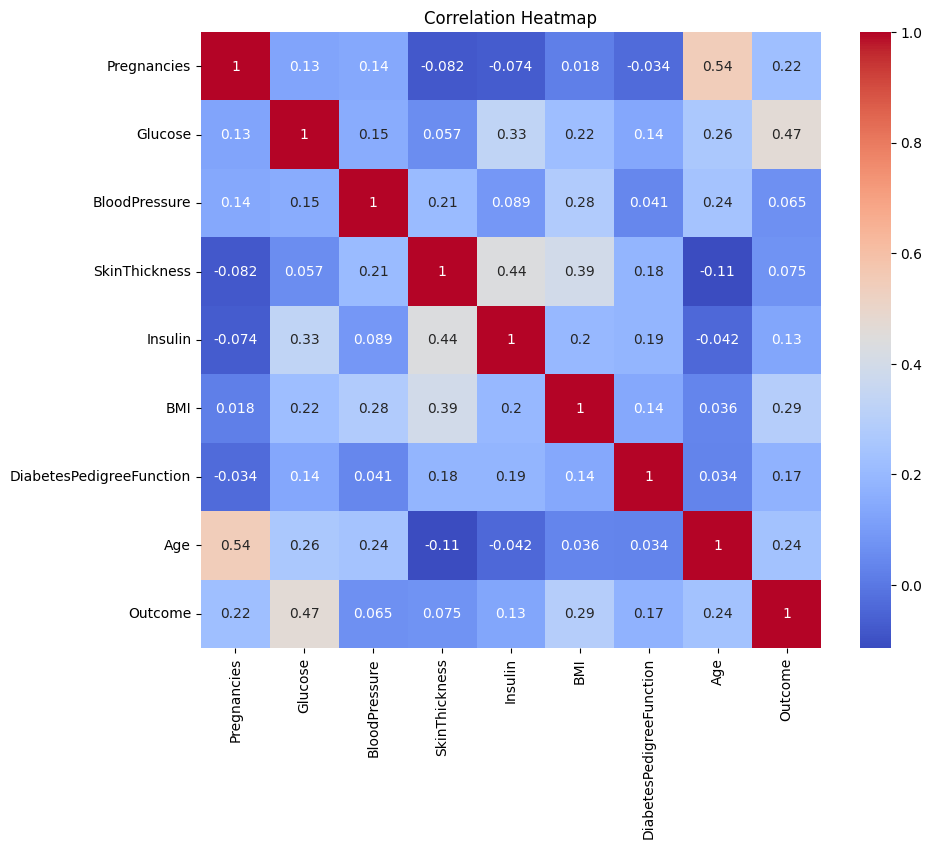


Average values by Outcome:
         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164  


In [3]:
# ------------------------------------------
# 2. Exploratory Visualization (Optional)
# ------------------------------------------

# BMI distribution
plt.figure(figsize=(8,5))
sns.histplot(data['BMI'], bins=30, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# Glucose levels by Outcome
plt.figure(figsize=(8,5))
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.title('Glucose Levels by Diabetes Outcome')
plt.xlabel('Outcome (0 = No, 1 = Yes)')
plt.ylabel('Glucose')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Average values by Outcome
print("\nAverage values by Outcome:")
print(data.groupby('Outcome').mean())


In [12]:
# ------------------------------------------
# 3. Prepare Data for Modeling
# ------------------------------------------

# Features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Train/Test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# ------------------------------------------
# 4. Logistic Regression
# ------------------------------------------
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Metrics:
Accuracy: 0.7142857142857143
Precision: 0.6086956521739131
Recall: 0.5185185185185185
F1-score: 0.56
Confusion Matrix:
 [[82 18]
 [26 28]]


In [14]:
# ------------------------------------------
# 5. Random Forest
# ------------------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))



Random Forest Metrics:
Accuracy: 0.7597402597402597
Precision: 0.6808510638297872
Recall: 0.5925925925925926
F1-score: 0.6336633663366337


In [15]:
# ------------------------------------------
# 6. XGBoost
# ------------------------------------------
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\nXGBoost Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1-score:", f1_score(y_test, y_pred_xgb))



XGBoost Metrics:
Accuracy: 0.7337662337662337
Precision: 0.6226415094339622
Recall: 0.6111111111111112
F1-score: 0.616822429906542


c:\Users\andre\AppData\Local\Programs\Python\Python314\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:48:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


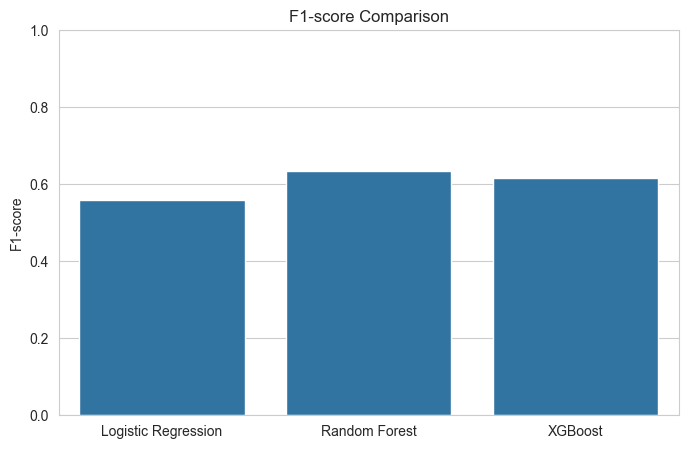

In [16]:
# ------------------------------------------
# 7. Compare F1-scores
# ------------------------------------------
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
f1_scores = [
    f1_score(y_test, y_pred_lr),
    f1_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_xgb)
]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=f1_scores)
plt.title('F1-score Comparison')
plt.ylabel('F1-score')
plt.ylim(0,1)
plt.show()